In [25]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time


#I/O 
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
VIPA_filename       =   'NO_ARS_12_02_VIPA_quasisat.tif'
log_file            =   'log_'+spectra_filename
analysis_dir        =   'analysis_new_cut_delta_lorentian/'

#operatives

#esclusi a mano
to_add              =   []

syg_kwargs          =   {'height': 119, 'distance': 31, 'width': 3.}
syg_kwargs_VIPA     =   {'distance':70, 'width': 1}
syg_kwargs_brill    =  {'height': 23, 'distance': 31, 'width': 3.}
VIPA_treshold       =   6
sat_height          =   50000
sat_width           =   13.5
#quanto mi allontano dal VIPA
pre_cut             =   False
cut                 =   True
dist_01 = 37
dist_23 = 34
#markov_fit
recover_markov = False
#percents_markov     =   ('positive', 0.2, 'positive', np.inf, 'positive', 'positive', 0.2, 0.2, 0.2,  np.inf, np.inf)
percents_markov     =   ('positive', 0.2, 'positive', np.inf, 'positive', 'positive', 0.1, 0.01, 0.001,  np.inf, np.inf)
percents_markov_smart     =   ('positive', 0.2, 'positive', np.inf, 'positive', 0.3, 0.05, .05, np.inf, np.inf)

#tot fit
percents_tot        = (0.2, 0.1, 0.5, 'positive', 'positive', 0.15,  0.15, 0.15, np.inf, np.inf)
############


cols_smart  =  ('Co', 'Omega', 'Gamma', 'delta_position',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_basic  = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude')
cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position',  'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


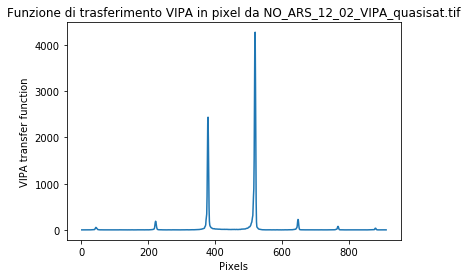

Text(0.5, 1.0, '(17, 27)')

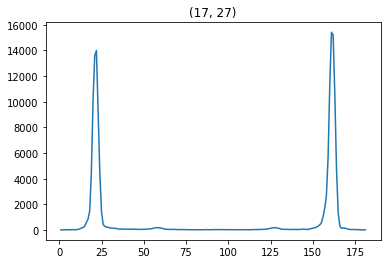

In [26]:
#0) importo dati e inizializzo oggetti
i   =   17
j   =   27
y    =   Import_from_Matlab(spectra_filename, now_path, var_name = 'y3')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = pre_cut, cut_range = (10, 175))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, now_path, fig = 'VIPA_img', save_path = now_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.title(str((i,j)))

Lo spettro è bono
Lo spettro ha 4 picchi


Text(0.5, 1.0, '(17, 27)')

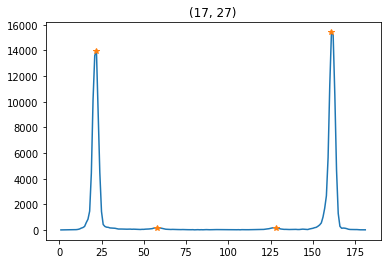

In [27]:
#1) Classificazione e visualizzazione spettro
check = Data.Check_Spectrum_Saturation(saturation_height = sat_height, saturation_width = sat_width)

if      check == 1  : nature    = 'saturo'
elif    (Data.n_peaks == 2) :

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    if (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][1]]) & (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][3]]):
        nature    = 'brillouin_highest_dx'
    elif (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][2]]) & (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][0]]):
        nature    = 'brillouin_highest_sx'
    else:
        raise ValueError ('Non ho riconosciuto lo spettro\n')

elif (Data.n_peaks == 3) :
    Data.Get_Spectrum_Peaks(**syg_kwargs_brill) 
    nature = 'brillouin_higher'
else:                 nature    = 'bono'
print('Lo spettro è '+nature)
print('Lo spettro ha {} picchi'.format(Data.n_peaks))
plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks['idx']], Data.y[Data.peaks['idx']], '*')
plt.title(str((i,j)))

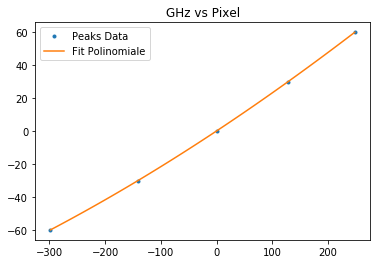

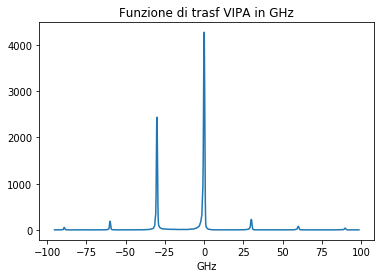

In [28]:
#2) Operazioni di conversione in GHz

Data.How_Many_Peaks_To_VIPA(treshold = VIPA_treshold, **syg_kwargs_VIPA)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)


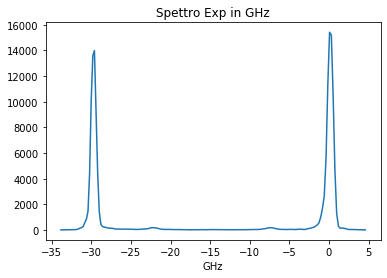

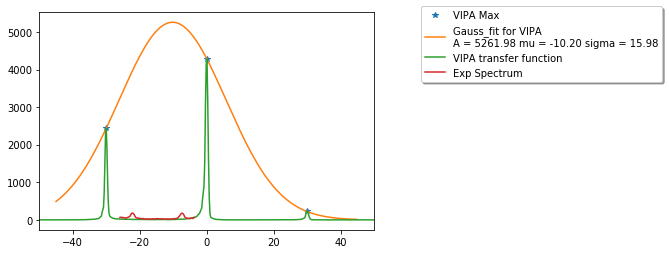

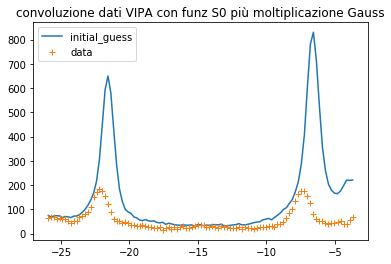

In [29]:
#3) Eseeguo taglio e stima parametri iniziali spettro, verifichepositive
Data.Align_Spectrum()
Data.Spectrum_Pix2GHz(fig = True)
Data.Cut_n_Estimate_Spectrum(estimate = True, cut = cut, mean_dist01 = dist_01, mean_dist23 = dist_23, verbose = True)
Data.Fit_VIPA_Gaussian(fig = True)
p0 = Data.p0[list(cols_mark)].values[0]
#p0 = np.array([ 1.00000000e+00,  7.58814822e+00,  1.00000000e-01,  0.00000000e+00,        1.00000000e-01,  1.00000000,  5.26197998e+03, -1.02027273e+01,     1.59764572e+01,  0.00000000e+00,  0.00000000e+00])
_ = Data.Gauss_Convolve_Markovian_Response(p0, fig = True, compare = True)

In [30]:
Data.p0[list(cols_mark)]

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.01,7.483899,0.1,0.0,0.1,1,5261.979978,-10.202727,15.976457,0.0,0


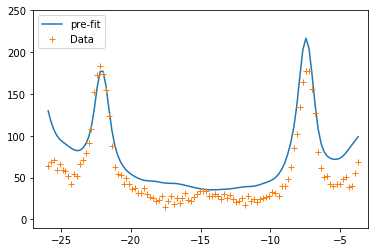

In [35]:
p0 = np.array([ 1.08633225e-01,  7.70983143e+00,  1.58967633e-01,  1.70455195e+00,
        6.40427573e-01,  2.20351667e+00,  5.23638443e+03, -10.18245455e+00,
        1.5973788115e+01,  2.73907418e-01,  8.73821212e+00])
plt.figure()
plt.plot(Data.x_freq, Data.Gauss_Convolve_Markovian_Response_Fast(p0), label = 'pre-fit' )
plt.plot(Data.x_freq, Data.y, '+', label = 'Data')
plt.xlim(-27, -3)
plt.ylim(-10, 250)
plt.legend()


Cost before fitting = 2330.289374385572
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.6746e+02                                    3.53e+03    
       1              2         1.5874e+02      5.09e+02       1.45e-01       7.11e+02    
       2              3         8.8592e+01      7.02e+01       1.08e+03       3.34e+02    
       3              4         6.4919e+01      2.37e+01       6.55e+02       2.83e+01    
       4              5         6.4085e+01      8.35e-01       1.32e+03       1.69e+00    
       5              9         6.4057e+01      2.78e-02       1.99e-01       4.75e+01    
       6             10         6.4018e+01      3.83e-02       1.04e+00       3.69e+00    
       7             13         6.4017e+01      1.20e-03       2.14e-02       8.11e-01    
       8             15         6.4017e+01      2.10e-04       9.75e-03       1.60e-01    
       9             16         6.4017e+01      3.

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.107187,7.630518,0.133280,1.975108,0.509986,1.666161,4.333627e+03,-10.049686,15.936516,0.277695,6.432116
StdErrs,0.036637,0.020327,0.014664,0.207758,0.217033,1.117130,5.548335e+09,5.710012,7.974266,0.020359,1.573755
Initials,0.010000,7.483899,0.100000,0.000000,0.100000,1.000000,5.261980e+03,-10.202727,15.976457,0.000000,0.000000


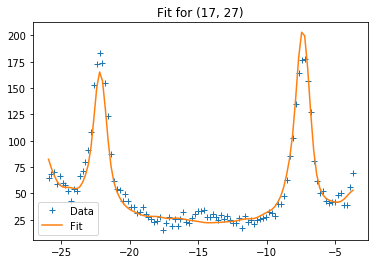

In [44]:
#3) fit markoviano
rules_markov_bound     =   ('positive', 0.2, 'positive', [-2,2], 'positive', 'positive', 0.2, 0.015, 0.0025, 'inf', 'inf')

Data.Get_cost_markov(Data.p0[list(cols_mark)].values[0], columns = cols_mark)
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(rules_markov_bound, cols_mark)
_= Data.Non_Linear_Least_Squares_Markov(cols_mark,p0, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 200, fig = True, zoom = False)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
Data.Get_cost_markov(Data.Markov_Fit_Params.values[0], columns = cols_mark)
print('Cost after fitting = {}\n'.format(Data.cost_markov))
Data.Markov_Fit_Params

In [45]:
Data.Markov_Fit_Params.values[0]

array([ 1.07186924e-01,  7.63051819e+00,  1.33280055e-01,  1.97510814e+00,
        5.09986043e-01,  1.66616101e+00,  4.33362727e+03, -1.00496864e+01,
        1.59365161e+01,  2.77695117e-01,  6.43211621e+00])

In [ ]:
#3) fit markoviano smart
Data.Get_cost_markov(Data.p0[list(cols_smart)].values[0], columns = cols_smart)
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(percents_markov_smart, cols_smart)
_= Data.Non_Linear_Least_Squares_Markov(cols_smart, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 200, fig = True, zoom = False)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
Data.Get_cost_markov(Data.Markov_Fit_Params.values[0], columns = cols_smart)
print('Cost after fitting = {}\n'.format(Data.cost_markov))
Data.Markov_Fit_Params

In [28]:
Data.Markov_Fit_Params.values[0]

array([ 9.94456383e-02,  7.48527792e+00,  9.95875236e-02, -2.00349830e-01,
        5.28149420e-04,  1.18085411e-01,  5.26197998e+03, -1.01008385e+01,
        1.58179541e+01,  1.27908705e-01,  4.08943689e+00])

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.099446,7.485278,0.099588,-0.200350,0.000528,0.118085,5.261980e+03,-10.100838,15.817954,0.127909,4.089437
StdErrs,0.221615,0.019808,0.011227,0.051744,0.428231,96.177925,1.022083e+10,33.973208,52.485261,0.016786,1.879404


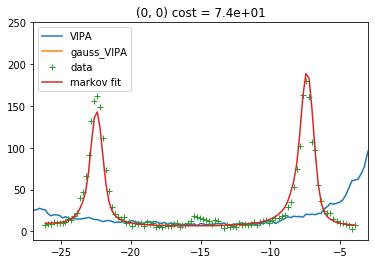

In [29]:
x = np.linspace(4, 26, 1000)
plt.figure()
plt.plot(Data.x_VIPA_freq, Data.y_VIPA, label = 'VIPA')
plt.plot(Data.x_freq, gaussian(Data.x_freq, *Data.Markov_Fit_Params[list(cols_gauss)].values[0]), label = 'gauss_VIPA')
plt.title(str((i,j))+' cost = {:3.2}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, '+', label = 'data')
plt.plot(Data.x_freq, Data.y_markov_fit, label = 'markov fit')
plt.xlim(-27, -3)
plt.ylim(-10, 250)
plt.legend()
J                =    Data.res_lsq.jac
cov              =    np.linalg.inv(J.T.dot(J))
Delta_Parameters =    np.sqrt(np.diagonal(cov))
df = pd.DataFrame([Data.res_lsq['x'], Delta_Parameters], columns=cols_mark, index= ('Values', 'StdErrs'))
df

In [ ]:
y_markov_fit_tricked = Data.Gauss_Convolve_Markovian_Response_Fast(np.array([ 6.52080428e-01,  7.24912239e+00,  1.32316400e-01,  4.94316064e-02,
        5.72147340e-02,  2.0566009e-01,  6.22012905e+02,  1.08734872e+01,
        1.66735309e+01,  2.07950292e-01, -1.06546696e+00]))

plt.figure()
plt.plot(Data.x_VIPA_freq, Data.y_VIPA, label = 'VIPA')
plt.plot(Data.x_freq, gaussian(Data.x_freq, *np.array([622.0129053 ,  10.87348721,  16.67353093])), label = 'gauss_VIPA')
plt.title(str((i,j))+' cost = {:3.2}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, '+', label = 'data')
plt.plot(Data.x_freq, y_markov_fit_tricked, label = 'markov fit')
plt.legend()
Data.Markov_Fit_Params.values[0]

In [ ]:
Data.res_lsq['x']


In [ ]:
plt.figure()
plt.title(str((i,j))+' cost = {}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, label = 'data')
plt.plot(Data.x_freq, Data.y_markov_fit, label = 'fit')
plt.xlim(3, 27)
plt.ylim(-5, 200)
plt.legend()


In [ ]:
#4) fit totale
percents                    =   (0.2, 0.1, 0.1, 'positive', 'positive', 0.15, 0.15, 0.15, np.inf, np.inf)
Data.Initials_Parameters_from_Markov(Data.Markov_Fit_Params.T['Values'].values)
Data.Get_Fit_Bounds(percents, columns = cols_real)
p_gauss = Data.Markov_Fit_Params[list(cols_gauss)].values[0]
Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 50)


In [ ]:
Data.Tot_Fit_Params

In [ ]:
Data.Markov_Fit_Params

In [ ]:
Analyze_Peaks(Data.x, Data.y, 'pix', **syg_kwargs, fig = True, verbose = True)